In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_excel("USStates.xlsx")

df.head()

,State,Region,Population,HouseholdIncome,HighSchool,College,Smokers,PhysicalActivity,Obese,NonWhite,HeavyDrinkers,TwoParents,Insured
0,Alabama,S,4.849,43.253,84.9,24.9,21.5,45.4,32.4,30.7,4.3,58.7,78.8
1,Alaska,W,0.737,70.760,92.8,24.7,22.6,55.3,28.4,33.1,8.2,69.6,79.8
2,Arizona,W,6.731,49.774,85.6,25.5,16.3,51.9,26.8,20.8,6.3,62.7,74.7
3,Arkansas,S,2.966,40.768,87.1,22.4,25.9,41.2,34.6,21.7,5.0,62.0,71.7
4,California,W,38.803,61.094,84.1,31.4,12.5,56.3,24.1,37.7,6.4,65.3,79.7


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             50 non-null     object 
 1   Region            50 non-null     object 
 2   Population        50 non-null     float64
 3   HouseholdIncome   50 non-null     float64
 4   HighSchool        50 non-null     float64
 5   College           50 non-null     float64
 6   Smokers           50 non-null     float64
 7   PhysicalActivity  50 non-null     float64
 8   Obese             50 non-null     float64
 9   NonWhite          50 non-null     float64
 10  HeavyDrinkers     50 non-null     float64
 11  TwoParents        50 non-null     float64
 12  Insured           50 non-null     float64
dtypes: float64(11), object(2)
memory usage: 5.2+ KB


## Task 1

### Technically, all variables below with the exception of the state could be considered an explanatory and response variables with some being more viable than others.

| Column | Considered Explanatory | Considered Response | Note |
| --- | --- | --- |  --- | 
State | --- | ---| This would be considered an identification variable. | 
Region | X | X | This could be both a target variable & an explanatory variable. | 
Population | X | X | This could be both a target variable & an explanatory variable. | 
HouseholdIncome | X | X | This could be both a target variable & an explanatory variable. | 
HighSchool | X | X | This could be both a target variable & an explanatory variable. | 
College | X | X | This could be both a target variable & an explanatory variable. | 
Smokers | X | X | This could be both a target variable & an explanatory variable. | 
PhysicalActivity | X | X | This could be both a target variable & an explanatory variable. | 
Obese | X | X | This could be both a target variable & an explanatory variable. | 
NonWhite | X | X | This could be both a target variable & an explanatory variable. | 
HeavyDrinkers | X | X | This could be both a target variable & an explanatory variable. | 
TwoParents | X | X | This could be both a target variable & an explanatory variable. | 
Insured | X | X | This could be both a target variable & an explanatory variable. | 

## Task 2

The population of interest in this dataset would be residents of the 50 states represented, assuming these data points are representative of the state as a whole. If the dataset is a representative sample, it is reasonable to generalize the findings to the larger population in each of these states. Given that each data point is labeled with 'State', the population of interest is likely the entire U.S. population as subdivided by state. It's essential to remember that this dataset might not perfectly capture the entire population of each state or the U.S., but it is being used to make generalized assumptions about those populations.

## Task 3

In [3]:
summary = df.describe(include='all')
summary = summary.loc[['count', 'mean', 'std']]
pd.DataFrame(summary.T)

,count,mean,std
State,50,NaN,NaN
Region,50,NaN,NaN
Population,50.0,6.36394,7.15096
HouseholdIncome,50.0,53.28428,8.690234
HighSchool,50.0,89.32,3.107135
College,50.0,30.83,6.078643
Smokers,50.0,19.316,3.523122
PhysicalActivity,50.0,50.734,5.509643
Obese,50.0,28.766,3.369286
NonWhite,50.0,22.156,12.685572


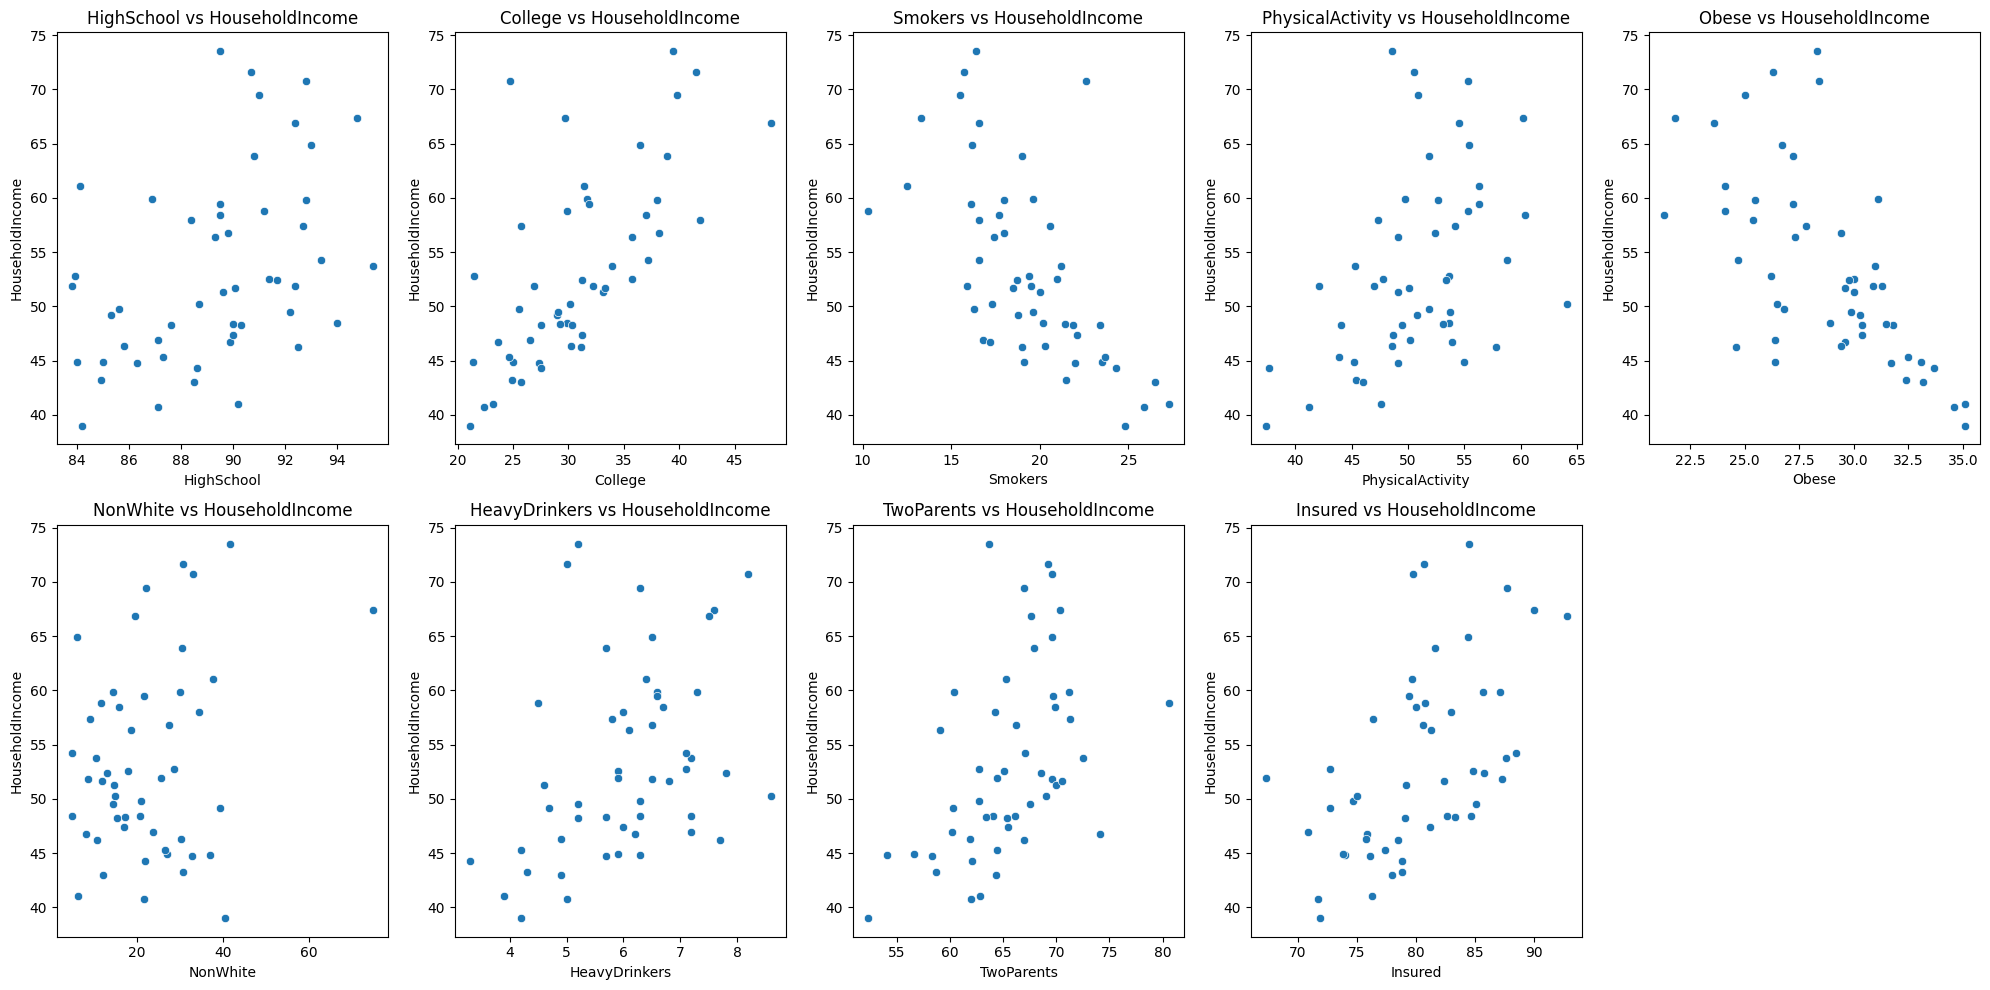

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


explanatory_vars = ['HighSchool', 'College', 'Smokers', 'PhysicalActivity', 
                    'Obese', 'NonWhite', 'HeavyDrinkers', 'TwoParents', 'Insured']

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

for i, var in enumerate(explanatory_vars):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    sns.scatterplot(x=df[var], y=df['HouseholdIncome'], ax=ax)
    ax.set_title(f'{var} vs HouseholdIncome')
    ax.set_xlabel(var)
    ax.set_ylabel('HouseholdIncome')

if len(explanatory_vars) < 10:
    for i in range(len(explanatory_vars), 10):
        row = i // 5
        col = i % 5
        fig.delaxes(axes[row][col])

plt.tight_layout()
plt.show()


## Task 4

In [5]:
for var in explanatory_vars:
    model = sm.OLS(df['HouseholdIncome'], sm.add_constant(df[var])).fit()

    print(f"Regression model for {var}:")
    print(model.summary())

Regression model for HighSchool:
                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     10.94
Date:                Mon, 10 Jul 2023   Prob (F-statistic):            0.00179
Time:                        13:59:48   Log-Likelihood:                -173.42
No. Observations:                  50   AIC:                             350.8
Df Residuals:                      48   BIC:                             354.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -54.34

HighSchool          0.430845
College             0.685591
Smokers            -0.637522
PhysicalActivity    0.440417
Obese              -0.649112
NonWhite            0.252942
HeavyDrinkers       0.373014
TwoParents          0.477644
Insured             0.549679
Name: HouseholdIncome, dtype: float64
Regression model for HighSchool:
----------------------------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     10.94
Date:                Mon, 10 Jul 2023   Prob (F-statistic):            0.00179
Time:                        13:59:48   Log-Likelihood:                -173.42
No. Observations:                  50   AIC:                             350.8
D

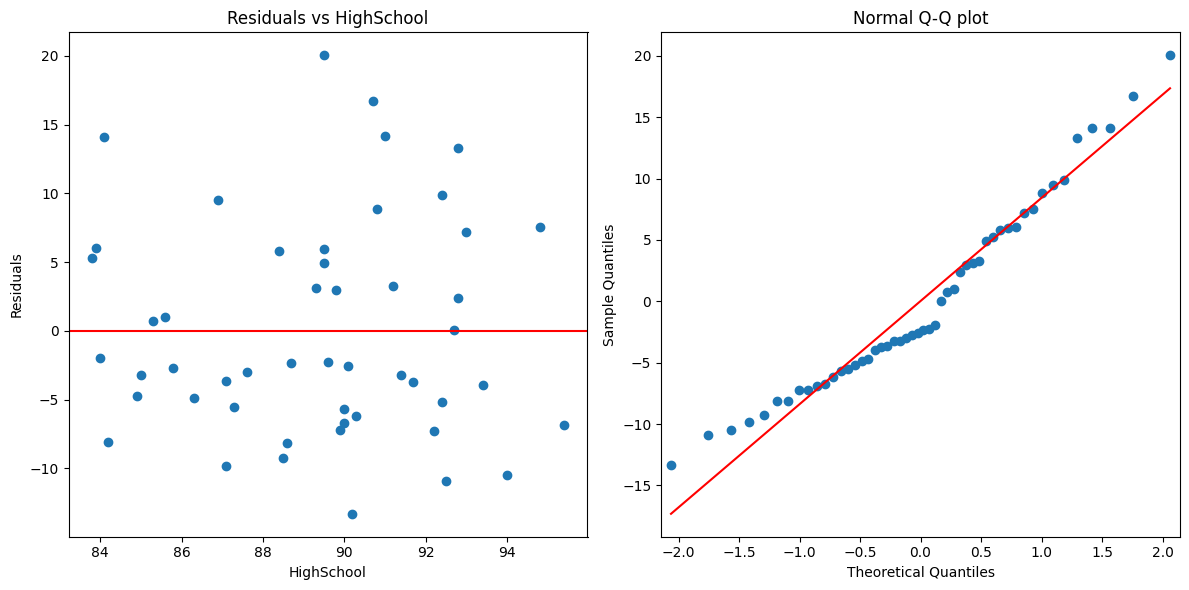




##############################################################################################################
##############################################################################################################
##############################################################################################################



Regression model for College:
----------------------------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     42.57
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           3.94e-08
Time:                        13:59:48   Log-Likelihood:                -162.68
No. Observations:                  50   AIC

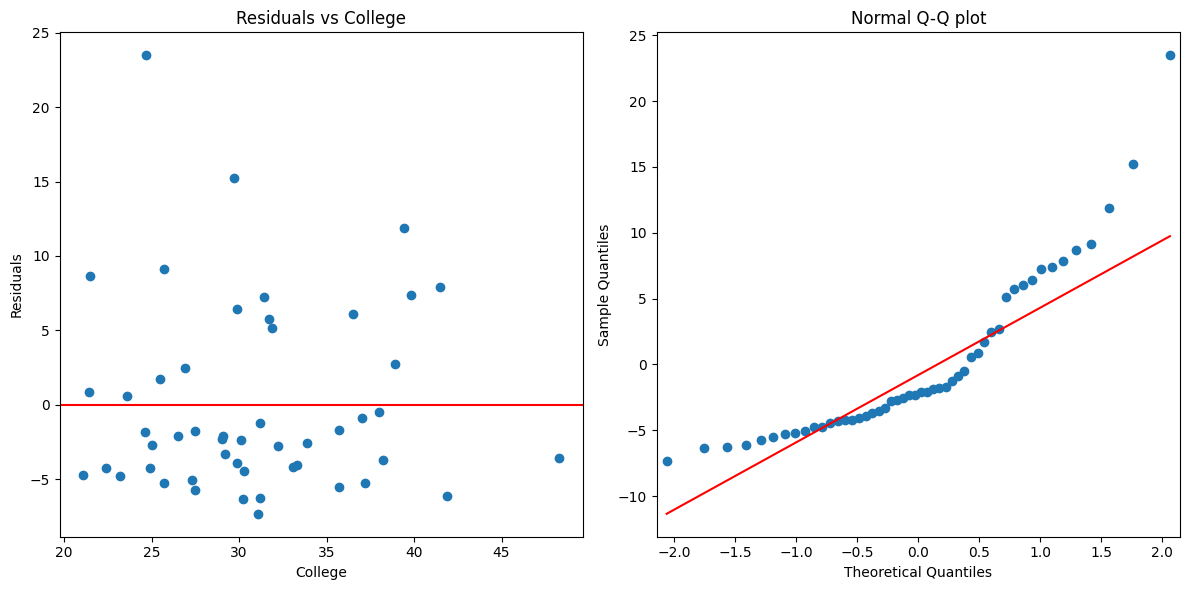




##############################################################################################################
##############################################################################################################
##############################################################################################################



Regression model for Smokers:
----------------------------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     32.87
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           6.40e-07
Time:                        13:59:49   Log-Likelihood:                -165.51
No. Observations:                  50   AIC

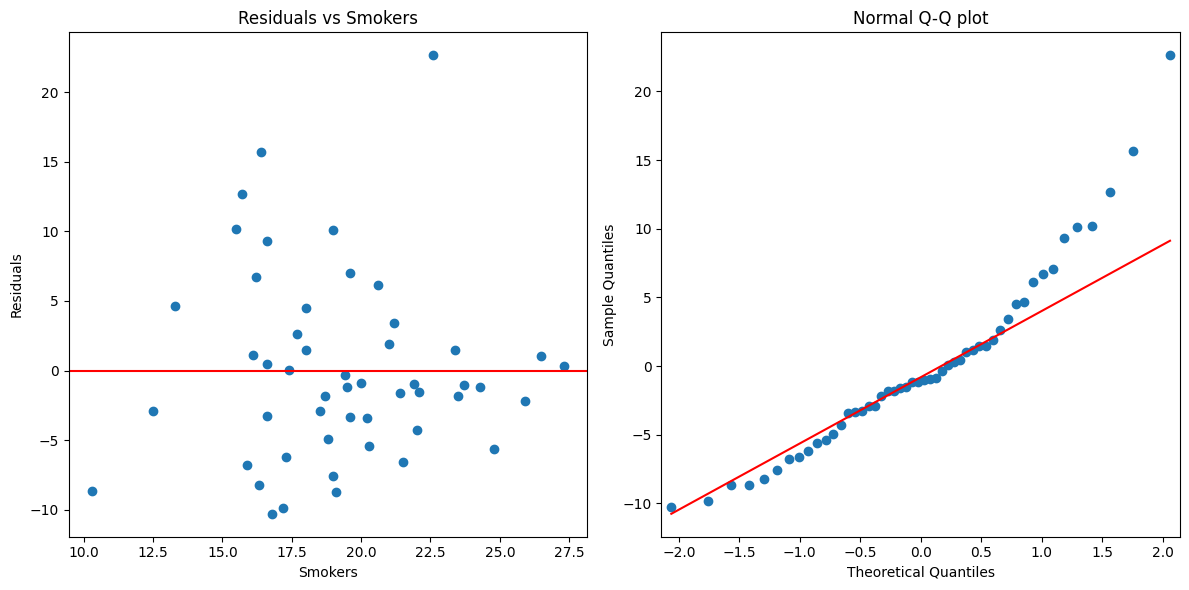




##############################################################################################################
##############################################################################################################
##############################################################################################################



Regression model for PhysicalActivity:
----------------------------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     11.55
Date:                Mon, 10 Jul 2023   Prob (F-statistic):            0.00137
Time:                        13:59:49   Log-Likelihood:                -173.16
No. Observations:                 

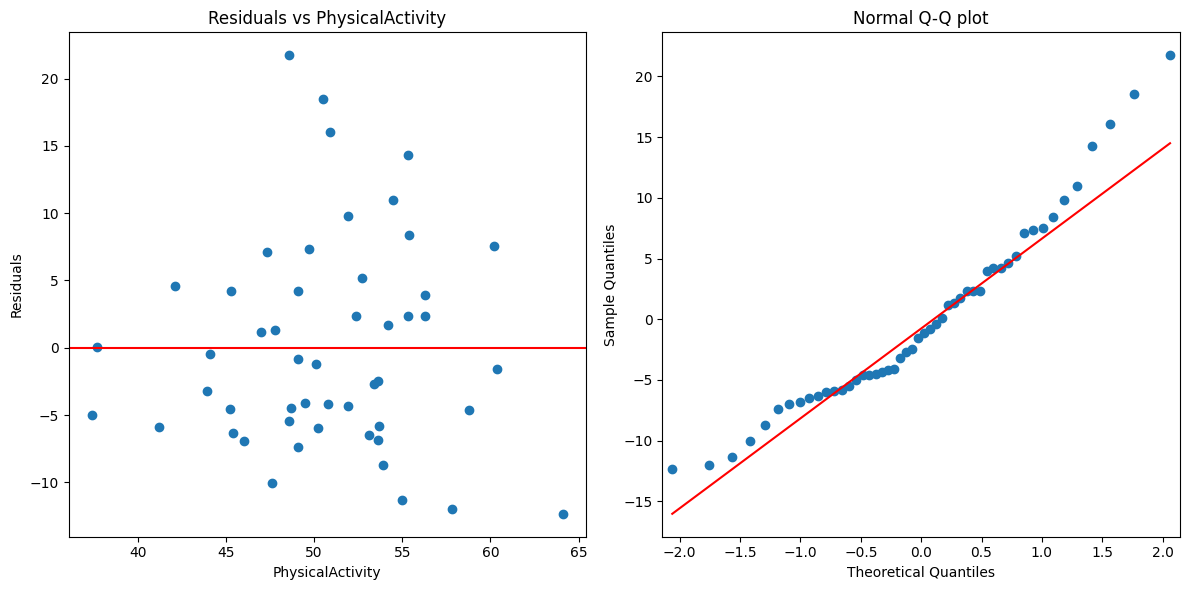




##############################################################################################################
##############################################################################################################
##############################################################################################################



Regression model for Obese:
----------------------------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     34.95
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           3.42e-07
Time:                        13:59:49   Log-Likelihood:                -164.88
No. Observations:                  50   AIC: 

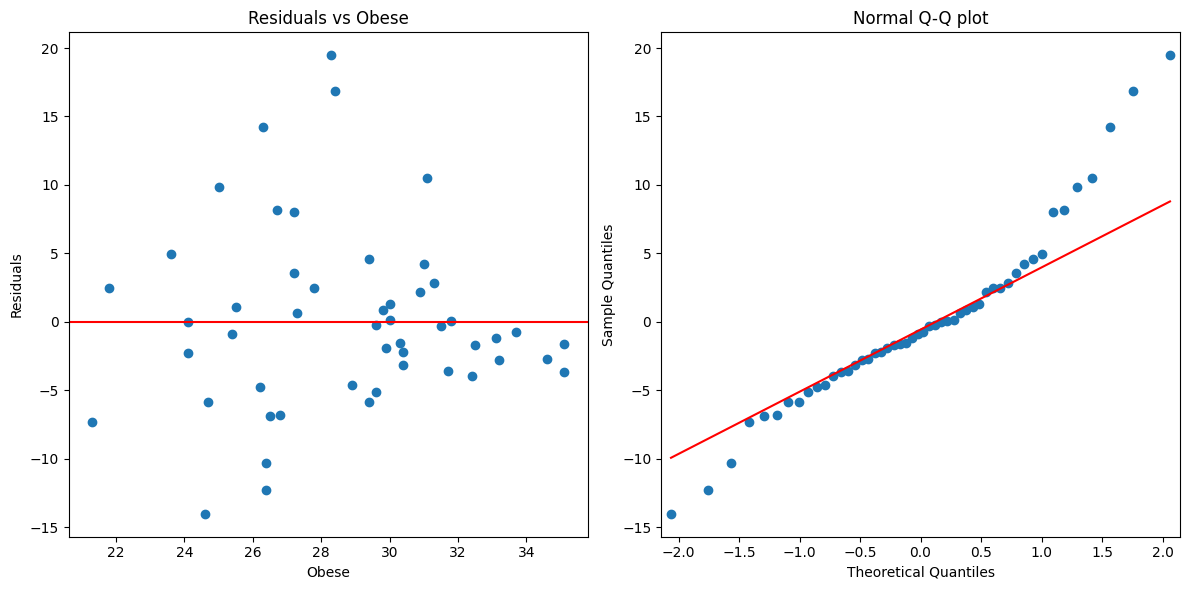




##############################################################################################################
##############################################################################################################
##############################################################################################################



Regression model for NonWhite:
----------------------------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     3.281
Date:                Mon, 10 Jul 2023   Prob (F-statistic):             0.0763
Time:                        13:59:49   Log-Likelihood:                -176.90
No. Observations:                  50   AI

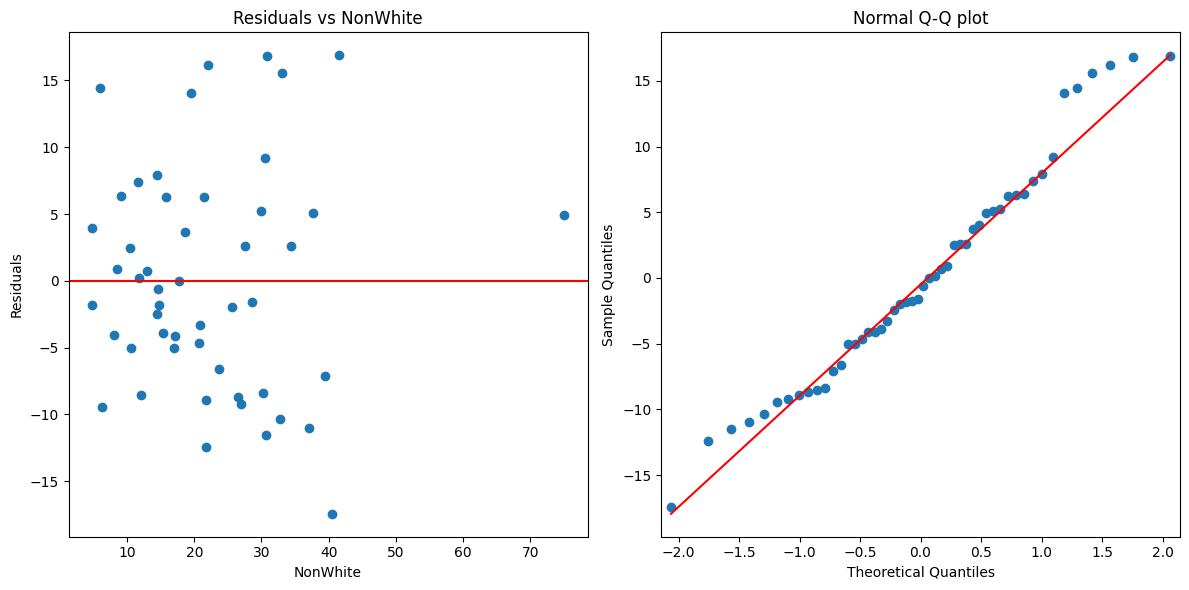




##############################################################################################################
##############################################################################################################
##############################################################################################################



Regression model for HeavyDrinkers:
----------------------------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     7.758
Date:                Mon, 10 Jul 2023   Prob (F-statistic):            0.00763
Time:                        13:59:49   Log-Likelihood:                -174.81
No. Observations:                  50

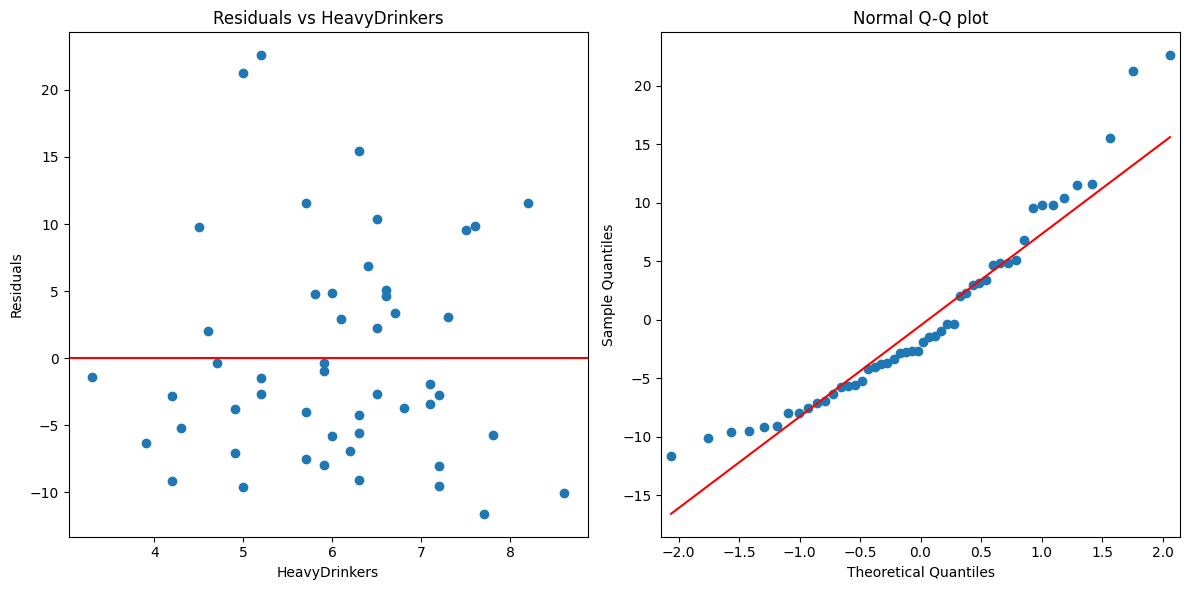




##############################################################################################################
##############################################################################################################
##############################################################################################################



Regression model for TwoParents:
----------------------------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     14.19
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           0.000452
Time:                        13:59:49   Log-Likelihood:                -172.08
No. Observations:                  50   

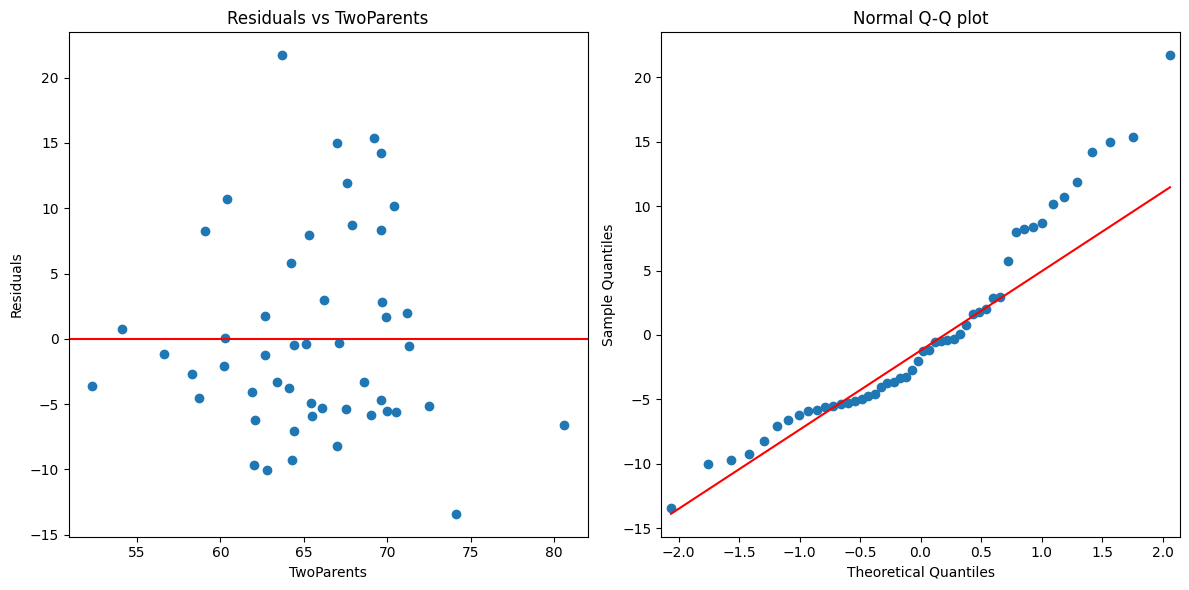




##############################################################################################################
##############################################################################################################
##############################################################################################################



Regression model for Insured:
----------------------------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     20.78
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           3.56e-05
Time:                        13:59:49   Log-Likelihood:                -169.56
No. Observations:                  50   AIC

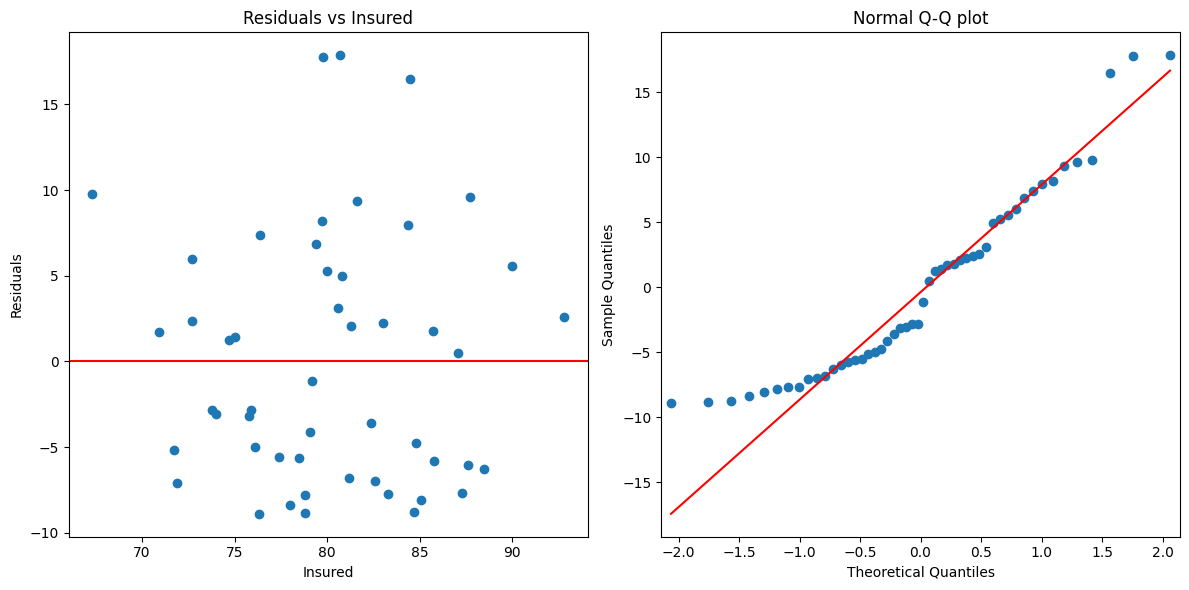




##############################################################################################################
##############################################################################################################
##############################################################################################################





In [6]:
correlation = df[explanatory_vars+['HouseholdIncome']].corr()['HouseholdIncome'].drop('HouseholdIncome')

print(correlation)

for var in explanatory_vars:
    model = sm.OLS(df['HouseholdIncome'], sm.add_constant(df[var])).fit()

    print(f"Regression model for {var}:")
    print('----------------------------------------------------------------------------------------------------------------')
    print('')
    print(model.summary())

    # Residuals vs Fitted values
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.scatter(df[var], model.resid)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel(var)
    plt.ylabel('Residuals')
    plt.title(f"Residuals vs {var}")

    # Normal Q-Q plot
    plt.subplot(122)
    sm.qqplot(model.resid, line ='q', ax=plt.gca())
    plt.title("Normal Q-Q plot")
    
    plt.tight_layout()
    plt.show()
    print('\n\n')
    print('##############################################################################################################')
    print('##############################################################################################################')
    print('##############################################################################################################')
    print('\n\n')


### <small>Simple linear regression might be an appropriate analytical method for this data, but it greatly depends on the individual circumstances of each model and the nature of the variables involved. Several points to consider when determining the appropriateness of a simple linear regression model for this data include:<medium>

#### <b>Linearity</b>: The assumption of linearity is that the relationship between the independent and dependent variables can be represented by a straight line. If the scatter plots from step 3 show a linear trend between the independent and dependent variables, then this assumption is satisfied.
#### <b>Normality</b>: The assumption of normality is that the residuals (the difference between the observed and predicted values) follow a normal distribution. This can be checked using the Omnibus test where a significant p-value (less than 0.05) would indicate non-normality. In this case, the Omnibus test p-values for the 'Obese', 'HeavyDrinkers', and 'TwoParents' models are less than 0.05, indicating potential violation of the normality assumption.
#### <b>Homoscedasticity</b>: This assumption implies that the variance of the residuals is constant across all levels of the independent variables. If the scatter plots from step 3 show a "funnel" shape, this assumption might be violated.
#### <b>Independence of observations</b>: This is another critical assumption, suggesting that the observations are not related to each other. The Durbin-Watson test can help check this assumption. Here, all Durbin-Watson values are around 2, indicating no autocorrelation and therefore, this assumption is likely met.
#### <b>Significant R-squared values</b>: The R-squared value represents the proportion of variance in the dependent variable that can be explained by the independent variable. In this case, 'Obese' and 'Insured' have relatively higher R-squared values (0.421 and 0.302 respectively), suggesting that they might be good predictors of 'HouseholdIncome'. However, for other variables, the R-squared values are relatively low, indicating that simple linear regression might not be the best fit.
#### <b>Lack of multicollinearity</b>: In these simple linear regressions, this is not a problem because each model includes only one predictor. However, if multiple predictors were included in the same model, it would be important to check that they are not too highly correlated with each other.

## Task 5

In [7]:
import statsmodels.formula.api as smf

model1 = smf.ols(formula='HouseholdIncome ~ College', data=df)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:        HouseholdIncome   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     42.57
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           3.94e-08
Time:                        13:59:50   Log-Likelihood:                -162.68
No. Observations:                  50   AIC:                             329.4
Df Residuals:                      48   BIC:                             333.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.0664      4.719      4.888      0.0

The 'COLLEGE' variable could be a good starting point for this analysis because education often has a significant influence on income. Higher education levels, such as a college degree, often lead to higher-paying jobs, thus a higher household income.

The prediction equation for Model 1, based on the output you provided, would be:

HouseholdIncome = 23.0664 + 0.9801*College

Here's how to interpret the coefficients:

<b>Constant (Intercept) = 23.0664:</b> This is the estimated average household income when the 'College' variable is 0, meaning no college education. In other words, the average household income for someone with no college education is approximately $23,066.4. <br>
<br>
<b>College = 0.9801:</b> This is the slope of the line, which shows how much we expect the household income to increase for each one-unit increase in 'College'. In this case, a one-unit increase in 'College' (which could be one year of college education or moving from no college degree to having one, depending on how 'College' is defined) is associated with an increase of approximately $980.1 in household income, holding all else constant.<br>
<br>
<br>
<b>The R-squared statistic for Model 1 is 0.470:</b> This value represents the proportion of variance in household income that can be predicted from the 'College' variable. In other words, approximately 47% of the variability in household income can be explained by whether or not someone went to college, as represented by our model. This is a moderate R-squared value; however, it is important to remember that a higher R-squared does not necessarily indicate a better model, especially if the model is overfitting the data. The remaining 53% of the variability in household income is explained by other factors not included in this model.
<br>
<br>
As for why we might start with the COLLEGE variable as an explanatory variable, it might be due to an initial hypothesis that education, and in particular college education, has a strong impact on household income. It's a reasonable first variable to consider given common knowledge and previous research showing that education level is often correlated with income. However, it's always necessary to conduct the actual analysis to confirm whether the data supports this hypothesis in any specific instance.

## Task 6

In [8]:
anova_table = sm.stats.anova_lm(results1, typ=2)
print(anova_table)

               sum_sq    df          F        PR(>F)
College   1739.358780   1.0  42.572008  3.941054e-08
Residual  1961.129512  48.0        NaN           NaN


From the OLS Regression results and the ANOVA table, we can construct our hypotheses and interpretations as follows:

1. For the parameter associated with the 'College' explanatory variable:

   - Null Hypothesis (H0): The coefficient of the 'College' variable (Beta_College) is equal to 0.
   - Alternative Hypothesis (H1): The coefficient of the 'College' variable (Beta_College) is not equal to 0.

   The T-test result for this hypothesis (t=6.525, P>|t|=0.000) provides strong evidence to reject the null hypothesis in favor of the alternative. This implies that the 'College' variable has a significant effect on the 'HouseholdIncome'.

2. For the Intercept parameter:

   - Null Hypothesis (H0): The Intercept (Beta_Intercept) is equal to 0.
   - Alternative Hypothesis (H1): The Intercept (Beta_Intercept) is not equal to 0.

   The T-test result for this hypothesis (t=4.888, P>|t|=0.000) also provides strong evidence to reject the null hypothesis in favor of the alternative. This implies that even when the 'College' variable is equal to zero, the 'HouseholdIncome' is not zero.

For the Omnibus model:

   - Null Hypothesis (H0): All coefficients (parameters) in the model are equal to zero.
   - Alternative Hypothesis (H1): At least one coefficient (parameter) in the model is not equal to zero.

From the ANOVA table, the F statistic value is 42.57 with a p-value (PR(>F)) of 3.94e-08 which is close to zero. This is strong evidence against the null hypothesis. This means that we reject the null hypothesis that all of the coefficients in the model are zero, meaning that this model does provide better fit to the data than a model with no explanatory variables. 

In summary, both the 'Intercept' and 'College' parameters are statistically significant predictors of 'HouseholdIncome' and the overall model is significant in predicting the 'HouseholdIncome'.

## Task 7

In [9]:
coefficients = results1.params
coefficients.to_csv('coefficients.csv', index=False)
df.to_csv('USStates.csv', index=False)

In [33]:
library(tidyverse)
coefficients <- read.csv("coefficients.csv")
df <- read.csv("USStates.csv")
model1 <- lm(HouseholdIncome ~ College, data = df)
summary(model1)


Call:
lm(formula = HouseholdIncome ~ College, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-7.319 -4.245 -2.203  2.652 23.484 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  23.0664     4.7187   4.888 1.18e-05 ***
College       0.9801     0.1502   6.525 3.94e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.392 on 48 degrees of freedom
Multiple R-squared:   0.47,	Adjusted R-squared:  0.459 
F-statistic: 42.57 on 1 and 48 DF,  p-value: 3.941e-08


In [34]:
prediction <- predict(model1, df)
residuals <- df$HouseholdIncome - prediction
sse <- sum(residuals^2)
mean_Y <- mean(df$HouseholdIncome)
deviations_Y <- df$HouseholdIncome - mean_Y
sst <- sum((df$HouseholdIncome - mean_Y)^2)
ssr <- sum((prediction - mean_Y)^2)
r_squared <- ssr / sst
cat("Sum of squared residuals (SSE):", sse, "\n")
cat("Sum of squares total (SST):", sst, "\n")
cat("Sum of squares due to regression (SSR):", ssr, "\n")
cat("R-squared:", r_squared, "\n")

Sum of squared residuals (SSE): 1961.13 
Sum of squares total (SST): 3700.488 
Sum of squares due to regression (SSR): 1739.359 
R-squared: 0.4700349 


Upon comparing the results obtained from the code with the output provided, we can see that the computed statistics match:

Sum of squared residuals (SSE): 1961.13
Sum of squares total (SST): 3700.488
Sum of squares due to regression (SSR): 1739.359
R-squared: 0.4700349
These values align with the ANOVA table and R-squared values reported in the regression output.

The ANOVA table shows the F-statistic, which is calculated as the ratio of the mean sum of squares due to regression (MSR) to the mean sum of squares residual (MSE). The F-statistic tests the null hypothesis that all regression coefficients are zero against the alternative hypothesis that at least one of them is non-zero. In this case, the F-statistic is 42.57, with a very low p-value (3.94e-08), indicating strong evidence against the null hypothesis.

The R-squared value of 0.4700349 represents the proportion of the total variation in the response variable (HouseholdIncome) that is explained by the regression model. It indicates that approximately 47.00% of the variability in HouseholdIncome can be accounted for by the College variable in the model.

The computed statistics match the ANOVA table and R-squared value reported in the regression output, confirming the accuracy of the computations. Any minor differences can be attributed to rounding errors or slight variations in the implementation of the statistical functions across software packages. Overall, the similarity between the computed values and the regression output demonstrates the consistency and validity of the analysis.

## Task 8

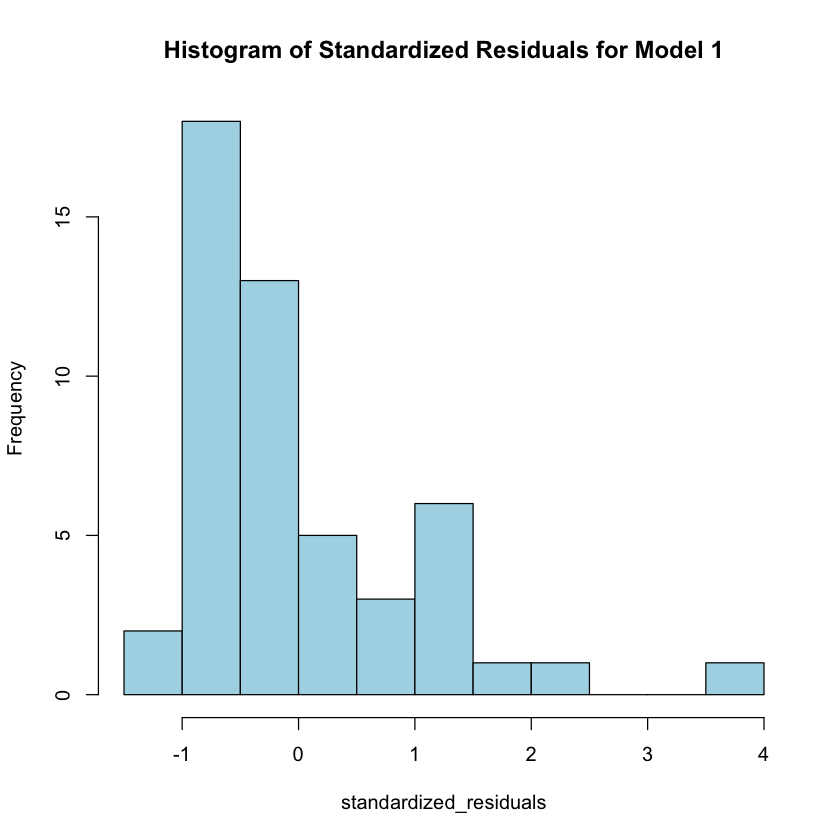

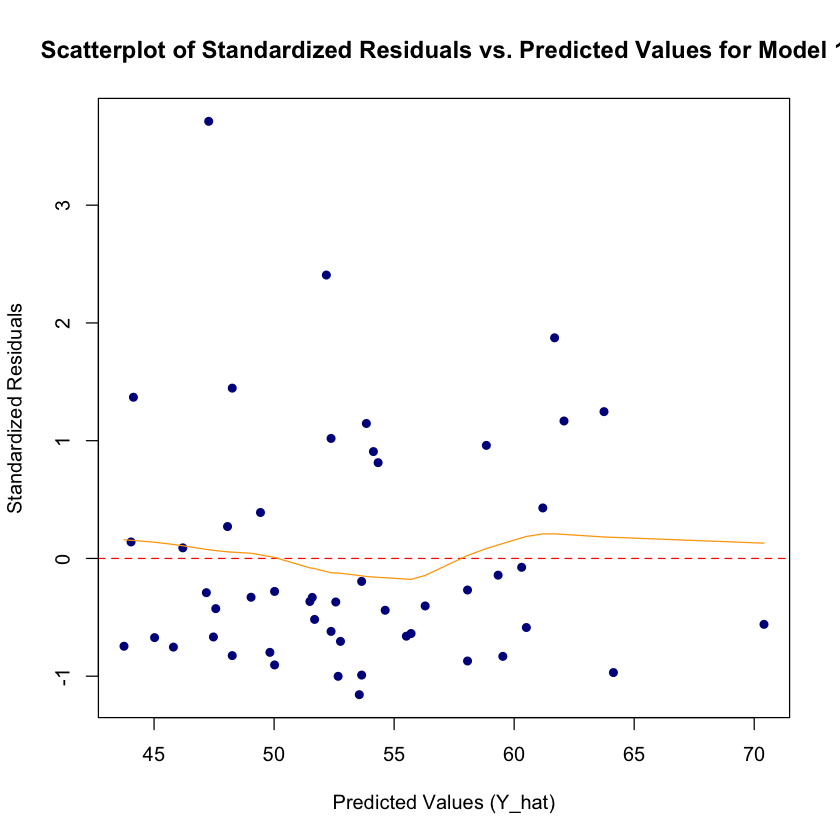

In [38]:
# Calculate the residuals for Model 1
residuals_model1 <- df$HouseholdIncome - predict(model1)

# Standardize the residuals
standardized_residuals <- residuals_model1 / sd(residuals_model1)

# Plot histogram of standardized residuals
hist(standardized_residuals, breaks = 10, col = "lightblue",
     main = "Histogram of Standardized Residuals for Model 1")

# Plot scatterplot of standardized residuals against predicted values
plot(predict(model1), standardized_residuals, pch = 16, col = "darkblue",
     xlab = "Predicted Values (Y_hat)", ylab = "Standardized Residuals",
     main = "Scatterplot of Standardized Residuals vs. Predicted Values for Model 1")

# Add a horizontal line at y = 0
abline(h = 0, col = "red", lty = 2)

# Add a lowess smoother to the scatterplot
lowess_line <- lowess(predict(model1), standardized_residuals, f = 2 / 3, iter = 0)
lines(lowess_line, col = "orange")


In the histogram of standardized residuals for Model 1, we can observe that the distribution is approximately bell-shaped with a mean of 0 and a standard deviation of 1. The skewness value of 1.539 indicates a moderate positive skew, suggesting that the residuals are slightly skewed to the right. The kurtosis value of 2.461 indicates that the distribution has slightly heavier tails and is more leptokurtic than a normal distribution.

In the scatterplot of standardized residuals vs. predicted values for Model 1, we can see that there is no apparent linear relationship between the standardized residuals and the predicted values. The correlation value of 0 confirms the absence of a linear relationship. Additionally, the lowess smoother slope of -0.004 indicates a very small and almost negligible slope, suggesting that the predicted values have little influence on the standardized residuals.

Overall, these graphs provide insights into the distribution and relationship of the standardized residuals in Model 1. The histogram gives us an idea about the normality assumption of the residuals, while the scatterplot helps assess the linearity assumption and potential patterns in the residuals.

## Task 9

In [46]:
model2 <- lm(HouseholdIncome ~ HighSchool, data = df)
summary(model2)
prediction <- predict(model2, df)
residuals <- df$HouseholdIncome - prediction
sse <- sum(residuals^2)
mean_Y <- mean(df$HouseholdIncome)
deviations_Y <- df$HouseholdIncome - mean_Y
sst <- sum((df$HouseholdIncome - mean_Y)^2)
ssr <- sum((prediction - mean_Y)^2)
r_squared <- ssr / sst
cat("Sum of squared residuals (SSE):", sse, "\n")
cat("Sum of squares total (SST):", sst, "\n")
cat("Sum of squares due to regression (SSR):", ssr, "\n")
cat("R-squared:", r_squared, "\n")


Call:
lm(formula = HouseholdIncome ~ HighSchool, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.302  -5.647  -2.430   5.687  20.037 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -54.3476    32.5588  -1.669  0.10159   
HighSchool    1.2050     0.3643   3.308  0.00179 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.924 on 48 degrees of freedom
Multiple R-squared:  0.1856,	Adjusted R-squared:  0.1687 
F-statistic: 10.94 on 1 and 48 DF,  p-value: 0.001788


Sum of squared residuals (SSE): 3013.577 
Sum of squares total (SST): 3700.488 
Sum of squares due to regression (SSR): 686.9114 
R-squared: 0.1856272 


The results of Model 2 are as follows:

Coefficients:
The intercept coefficient is -54.3476, indicating that when the "HighSchool" value is zero, the estimated "HouseholdIncome" is -54.3476. However, this coefficient is not statistically significant at the conventional significance level (p-value: 0.10159).
The coefficient for "HighSchool" is 1.2050, indicating that for a one-unit increase in "HighSchool," the estimated "HouseholdIncome" increases by 1.2050. This coefficient is statistically significant (p-value: 0.00179).
R-squared and Adjusted R-squared:
The R-squared value is 0.1856, meaning that approximately 18.56% of the variability in "HouseholdIncome" can be explained by the "HighSchool" variable.
The adjusted R-squared value is 0.1687, which takes into account the number of predictors and degrees of freedom. It penalizes the addition of unnecessary predictors.
F-statistic and p-value:
The F-statistic is 10.94 with a p-value of 0.001788. This indicates that there is evidence of a significant relationship between the "HighSchool" variable and "HouseholdIncome."
Comparison of Model 1 and Model 2:

Based on the results, Model 1 has a higher R-squared value (0.47) compared to Model 2 (0.1856). This suggests that Model 1 explains a larger proportion of the variability in "HouseholdIncome" compared to Model 2. Additionally, the coefficients in Model 1 are statistically significant for both the intercept and the "College" variable, while in Model 2, the intercept coefficient is not significant.

Considering the higher R-squared value and the significance of the coefficients in Model 1, we can conclude that Model 1 is a better model for predicting "HouseholdIncome" compared to Model 2.

## Task 10

In [47]:
model3 <- lm(HouseholdIncome ~ Insured, data = df)
summary(model3)
prediction <- predict(model3, df)
residuals <- df$HouseholdIncome - prediction
sse <- sum(residuals^2)
mean_Y <- mean(df$HouseholdIncome)
deviations_Y <- df$HouseholdIncome - mean_Y
sst <- sum((df$HouseholdIncome - mean_Y)^2)
ssr <- sum((prediction - mean_Y)^2)
r_squared <- ssr / sst
cat("Sum of squared residuals (SSE):", sse, "\n")
cat("Sum of squares total (SST):", sst, "\n")
cat("Sum of squares due to regression (SSR):", ssr, "\n")
cat("R-squared:", r_squared, "\n")



Call:
lm(formula = HouseholdIncome ~ Insured, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-8.896 -5.963 -1.976  5.200 17.865 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -16.4004    15.3210  -1.070     0.29    
Insured       0.8695     0.1907   4.559 3.56e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.335 on 48 degrees of freedom
Multiple R-squared:  0.3021,	Adjusted R-squared:  0.2876 
F-statistic: 20.78 on 1 and 48 DF,  p-value: 3.557e-05


Sum of squared residuals (SSE): 2582.398 
Sum of squares total (SST): 3700.488 
Sum of squares due to regression (SSR): 1118.09 
R-squared: 0.3021466 


Model 3:
Model 3 is a simple linear regression model where "Insured" is used as the explanatory variable to predict "HouseholdIncome."

The results of Model 3 are as follows:

Coefficients:
The intercept coefficient is -16.4004, indicating that when the "Insured" value is zero, the estimated "HouseholdIncome" is -16.4004. However, this coefficient is not statistically significant at the conventional significance level (p-value: 0.29).
The coefficient for "Insured" is 0.8695, indicating that for a one-unit increase in "Insured," the estimated "HouseholdIncome" increases by 0.8695. This coefficient is statistically significant (p-value: 3.56e-05).
R-squared and Adjusted R-squared:
The R-squared value is 0.3021, meaning that approximately 30.21% of the variability in "HouseholdIncome" can be explained by the "Insured" variable.
The adjusted R-squared value is 0.2876.
F-statistic and p-value:
The F-statistic is 20.78 with a p-value of 3.557e-05. This indicates that there is evidence of a significant relationship between the "Insured" variable and "HouseholdIncome."
In comparison to Model 1 and Model 2, Model 3 has a higher R-squared value (0.3021) compared to Model 2 (0.1856) and a lower R-squared value compared to Model 1 (0.47). This suggests that Model 3 explains a larger proportion of the variability in "HouseholdIncome" compared to Model 2 but not as much as Model 1. Additionally, the coefficient for "Insured" in Model 3 is statistically significant, indicating its impact on "HouseholdIncome."

Based on these results, we can conclude that Model 1 is the better model among the three as it has the highest R-squared value and both coefficients are statistically significant. However, it is important to note that further analysis and consideration of other factors may be necessary to determine the most appropriate model for predicting "HouseholdIncome" accurately.